## Loading of Stringer spontaneous data

includes some visualizations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
from scipy.ndimage import uniform_filter1d
from scipy.stats import zscore
from sklearn.decomposition import PCA

C:\Users\Leo\miniconda3\envs\nma-compneuro\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Leo\miniconda3\envs\nma-compneuro\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Leo\miniconda3\envs\nma-compneuro\lib\site-packages\umap\distances.

In [2]:
# @title Figure settings
from matplotlib import rcParams

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [3]:
# @title Data loading

dat = np.load('../../data/stringer_spontaneous.npy', allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


In [4]:
dat["beh_svd_time"][0].shape

(1000,)


dat has fields:
* `dat['sresp']`: neurons by timebins, a.k.a. the neural response data (11983 by 7018). Timebin = 1.2 sec.
* `dat['run']`: timebins by 1, a.k.a. the running speed of the animal in a.u.
* `dat['xyz']`: three-dimensional position of each neuron in the brain.
* `dat['pupilArea']`: timebins by 1, see FaceMap for details on the pupil tracker
* `dat['pupilCOM']`: timebins by 2, correspond to X and Y position. See FaceMap for details on the pupil tracker.
* `dat['beh_svd_time']`: timebins by 1,000. Timecourses of behavioral SVDs extracted from face movies. See FaceMap for details.
* `dat['beh_svd_mask']`: 240 by 320 by 1,000. Spatial masks of behavioral SVDs. Roughly normalized to each other.
* `dat['beh_svd_mask'] @ dat['beh_svd_time'][T, :]`:  reconstruction of the face movie (its motion energy) for frame T
* `dat['stat']`: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.

- Running speed
- Neural
- Pupil area
- pupil
- Facemobvie
- 

In [5]:
print(dat['sresp'].shape)
print(len(dat['stat']))

(11983, 7018)
11983


In [6]:
for k, v in dat.items():
  print("Key: {}".format(k))
  print(v.shape)
  # try:
  #   print(v[:5,:5,:5])
  # except:
  #   print(v[:5,:5])


Key: sresp
(11983, 7018)
Key: run
(7018, 1)
Key: beh_svd_time
(7018, 1000)
Key: beh_svd_mask
(240, 320, 1000)
Key: stat
(11983, 1)
Key: pupilArea
(7018, 1)
Key: pupilCOM
(7018, 2)
Key: xyz
(3, 11983)


In [7]:
dat["sresp"][0]

array([ 2.9820833,  8.409119 , 12.720393 , ...,  0.       , 11.900859 ,
        7.5612717], dtype=float32)

# Neural EDA

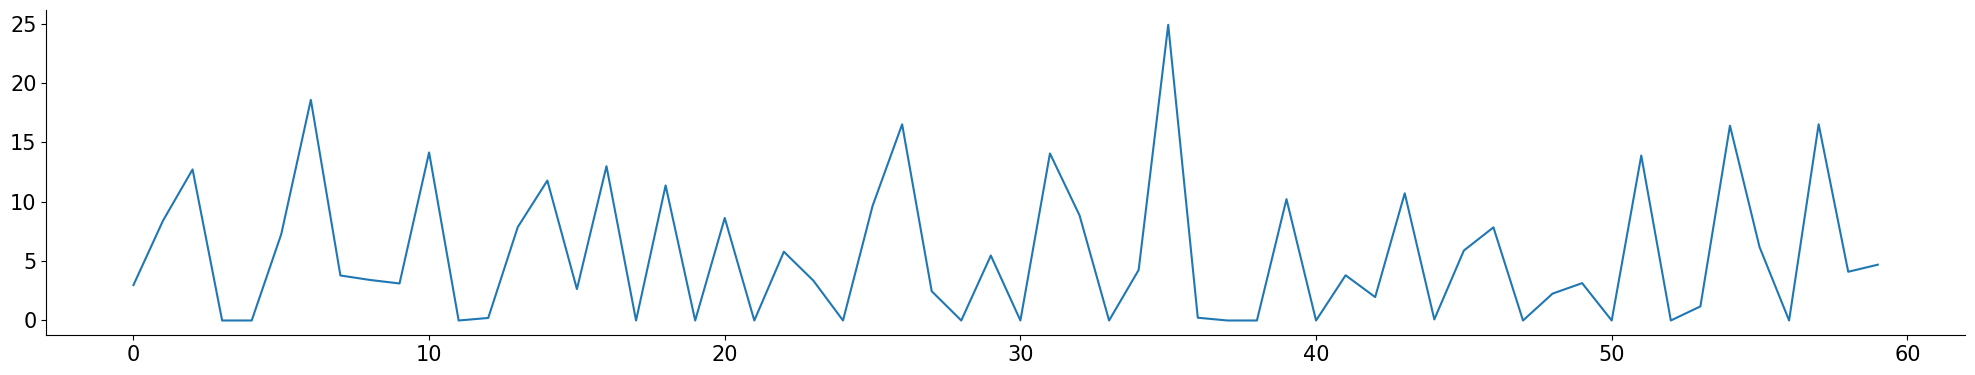

In [18]:
plt.plot(dat['sresp'][0][:60])

In [19]:
# compute deconvolution
from suite2p.extraction import dcnv
import numpy as np

Could not load the sbx reader, installing with pip.


In [29]:
tau = 1.0 # timescale of indicator
# fs = 30.0 # sampling rate in Hz
fs = 1 # sampling rate in Hz
neucoeff = 0.7 # neuropil coefficient
# for computing and subtracting baseline
baseline = 'maximin' # take the running max of the running min after smoothing with gaussian
sig_baseline = 10.0 # in bins, standard deviation of gaussian with which to smooth
win_baseline = 60.0 # in seconds, window in which to compute max/min filters

ops = {'tau': tau, 'fs': fs, 'neucoeff': neucoeff,
       'baseline': baseline, 'sig_baseline': sig_baseline, 'win_baseline': win_baseline}


In [30]:
# load traces and subtract neuropil
Fc = dat["sresp"]

In [31]:
# baseline operation
Fc = dcnv.preprocess(
     F=Fc,
     baseline=ops['baseline'],
     win_baseline=ops['win_baseline'],
     sig_baseline=ops['sig_baseline'],
     fs=ops['fs'],
     # prctile_baseline=ops['prctile_baseline']
 )


In [32]:

# get spikes
spks = dcnv.oasis(F=Fc, batch_size=2, tau=ops['tau'], fs=ops['fs'])

In [33]:
spks

array([[ 0.        ,  3.844645  ,  2.80313   , ...,  0.        ,
         4.78702   ,  0.        ],
       [ 0.        ,  2.9279087 ,  0.        , ...,  0.        ,
         0.        , 11.8463125 ],
       [ 0.        ,  0.        ,  0.        , ...,  1.3043739 ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , 20.486996  , ...,  0.        ,
         9.998736  , 87.33699   ],
       [ 0.        , 11.798939  , 91.0174    , ...,  7.789929  ,
         0.        , 69.56832   ],
       [ 0.        ,  0.        ,  1.7384691 , ...,  0.        ,
         0.18721512,  0.        ]], dtype=float32)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

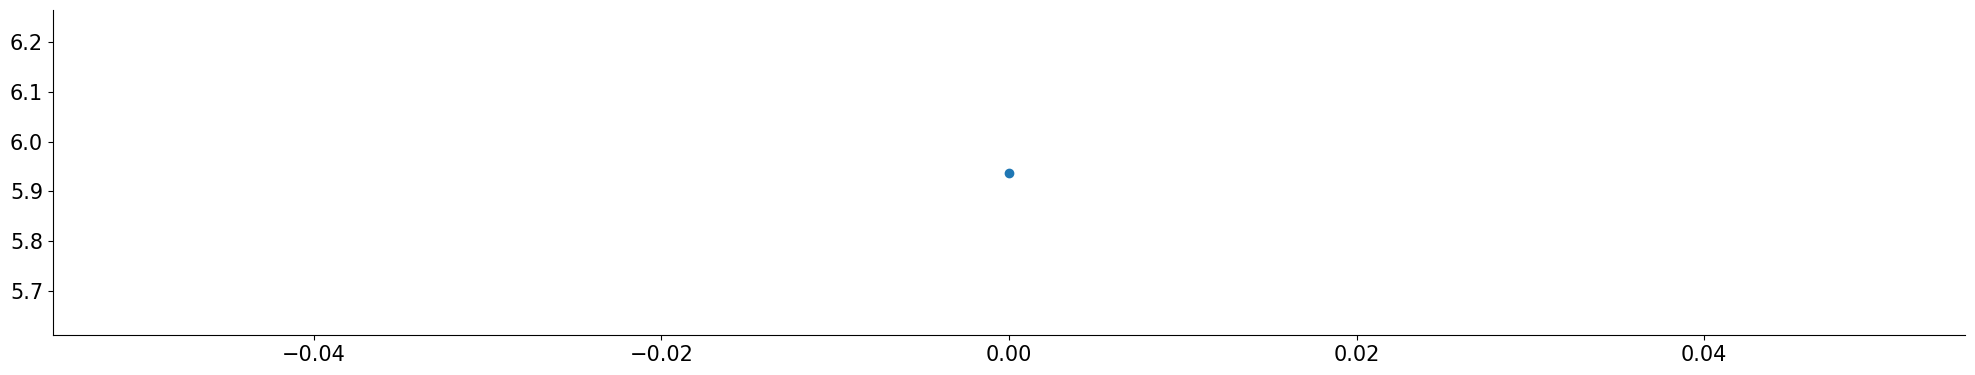

In [47]:
plt.plot(np.std(dat["sresp"][0][:60], axis=0), marker="o")

In [49]:
z_scored_trace = zscore(dat["sresp"][0])

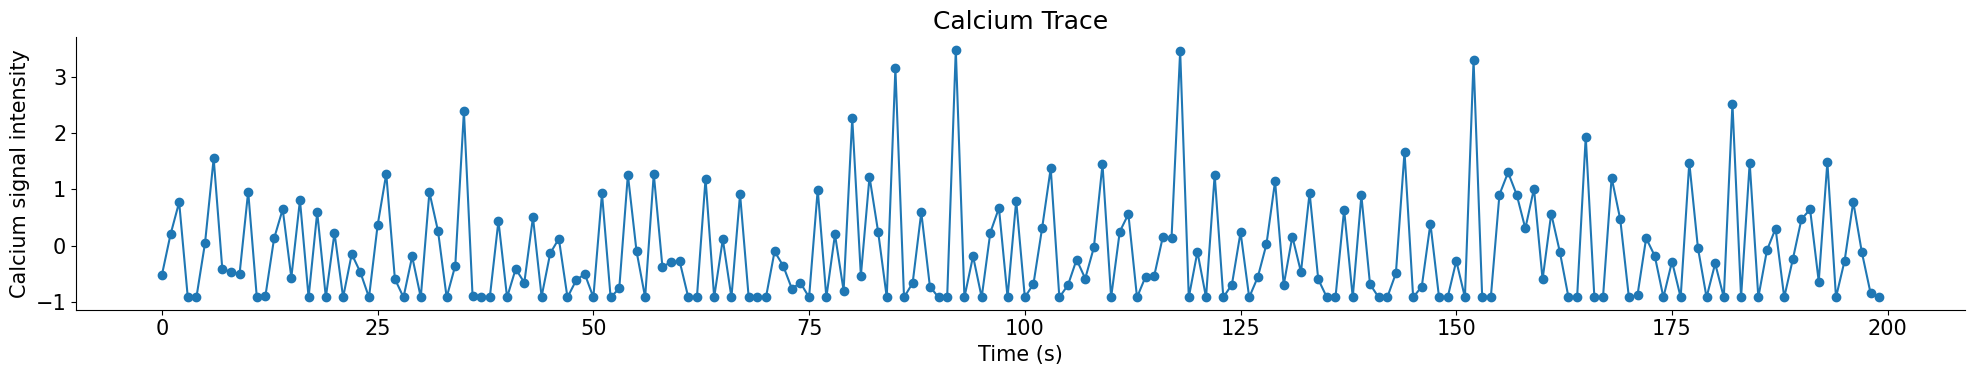

In [52]:

plt.plot(z_scored_trace[:200], marker='o')
plt.title('Calcium Trace')
plt.xlabel('Time (s)')
plt.ylabel('Calcium signal intensity')
plt.show()

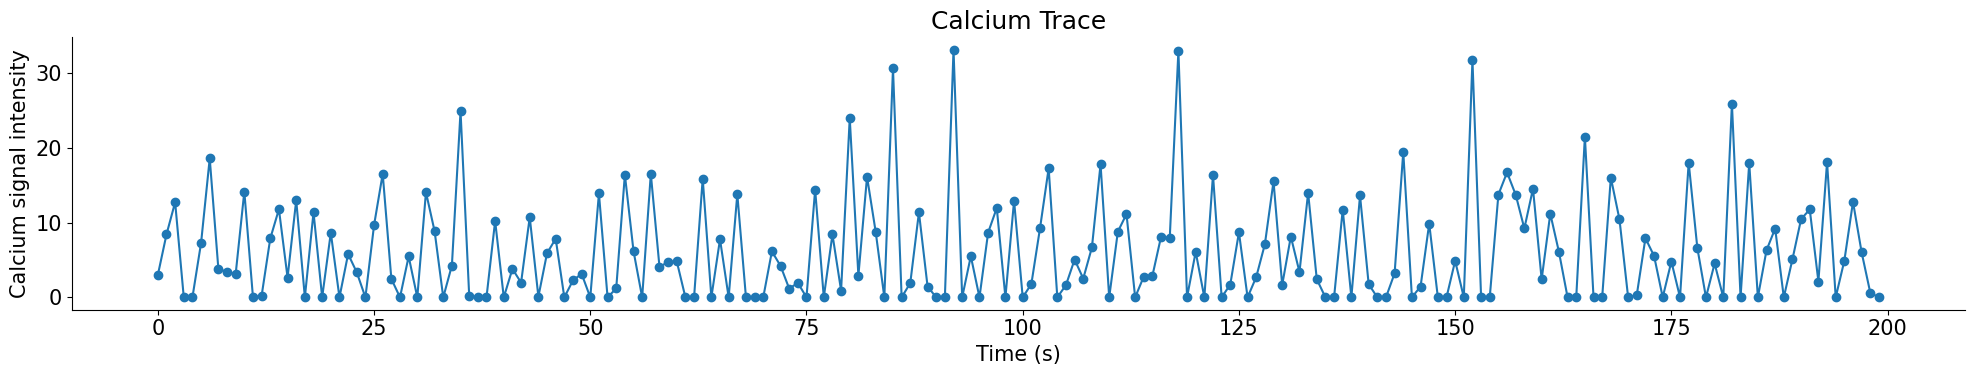

In [53]:
plt.plot(dat["sresp"][0][:200], marker='o')
plt.title('Calcium Trace')
plt.xlabel('Time (s)')
plt.ylabel('Calcium signal intensity')
plt.show()

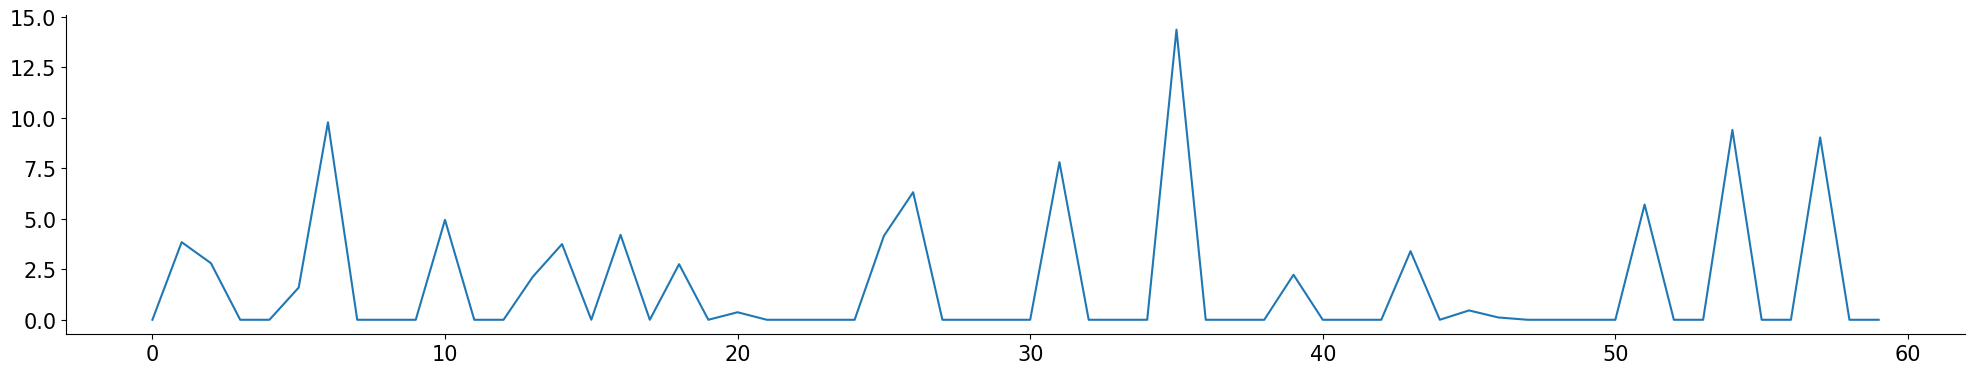

In [37]:
plt.plot(spks[0][:60])

raise ValueError("OLD STUFF)

C:\Users\Leo\AppData\Local\Temp\ipykernel_24132\1627216238.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet')(xc)


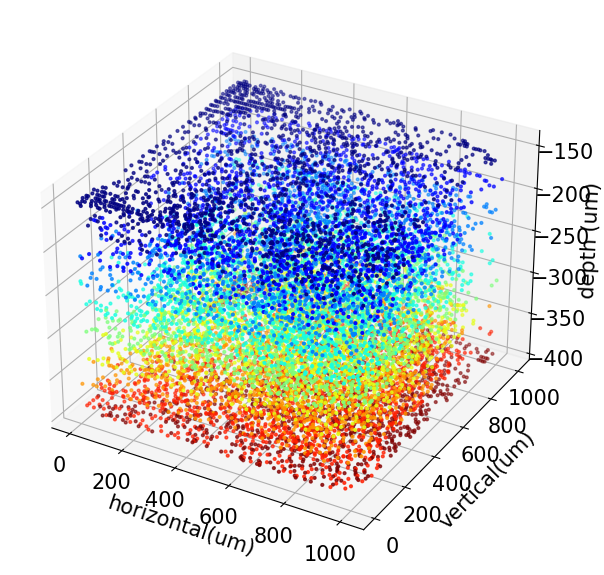

In [8]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = dat['xyz']

zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1],y[::-1], z[::-1], 'o', s=4, c=cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel='vertical(um)', zlabel='depth (um)')
plt.show()

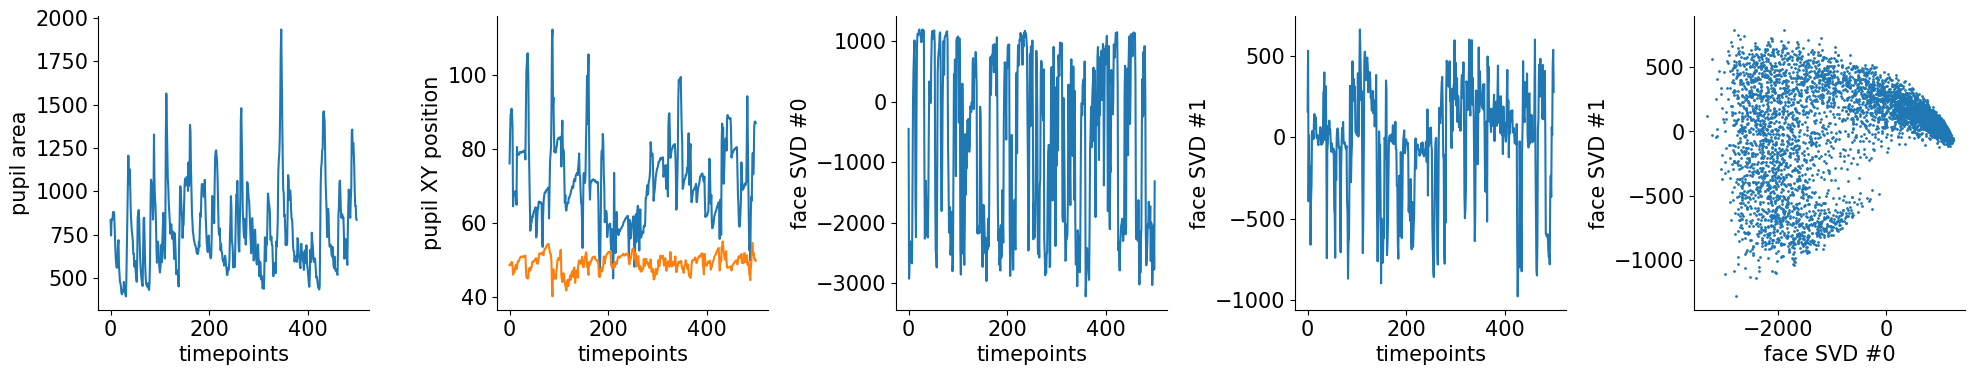

In [9]:
# @title Basic properties of behavioral data using plot and scatter
ax = plt.subplot(1, 5, 1)
plt.plot(dat['pupilArea'][:500, 0])
ax.set(xlabel='timepoints', ylabel='pupil area')

ax = plt.subplot(1, 5, 2)
plt.plot(dat['pupilCOM'][:500, :])
ax.set(xlabel='timepoints', ylabel='pupil XY position')

ax = plt.subplot(1, 5, 3)
plt.plot(dat['beh_svd_time'][:500, 0])
ax.set(xlabel='timepoints', ylabel='face SVD #0')

ax = plt.subplot(1, 5, 4)
plt.plot(dat['beh_svd_time'][:500, 1])
ax.set(xlabel='timepoints', ylabel='face SVD #1')

ax = plt.subplot(1, 5, 5)
plt.scatter(dat['beh_svd_time'][:, 0], dat['beh_svd_time'][:, 1], s=1)
ax.set(xlabel='face SVD #0', ylabel='face SVD #1')

plt.show()

In [10]:
# @title take PCA after preparing data by z-score

Z = zscore(dat['sresp'], axis=1)
Z = np.nan_to_num(Z)
X = PCA(n_components=200).fit_transform(Z)

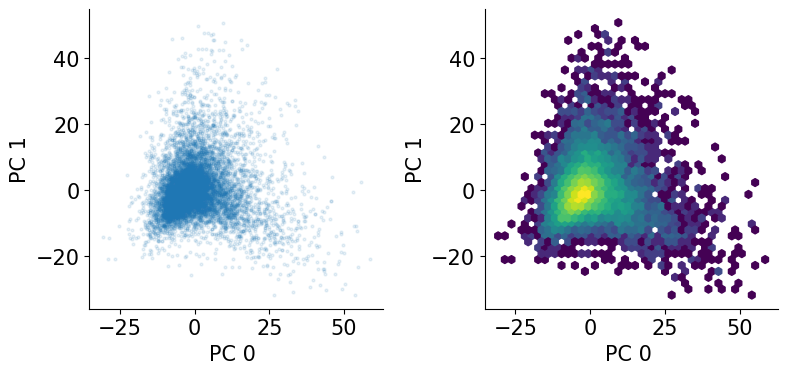

In [11]:
# @title Plot PCs. Too many points, switch to logarithmic hexbin!
ax = plt.subplot(1, 5, 1)
plt.scatter(X[:, 0], X[:, 1], s=4, alpha=.1)
ax.set(xlabel='PC 0 ', ylabel='PC 1')

ax = plt.subplot(1, 5, 2)
plt.hexbin(X[:, 0], X[:, 1], gridsize=40, bins='log')
ax.set(xlabel='PC 0 ', ylabel='PC 1', alpha=.1)

plt.show()

In [12]:
# @title run a manifold embedding algorithm (UMAP) in two or three dimensions.

ncomp = 1 # try 2, then try 3
xinit = 1 * zscore(X[:, :ncomp], axis=0)
embed = UMAP(n_components=ncomp, init=xinit, n_neighbors=20,
             metric='correlation', transform_seed=42).fit_transform(X)

In [13]:
embed = embed.flatten()
isort = np.argsort(embed)
RasterMap = uniform_filter1d(Z[isort, :], size=50, axis=0)
RasterMap = zscore(RasterMap[::10, :], axis=1)

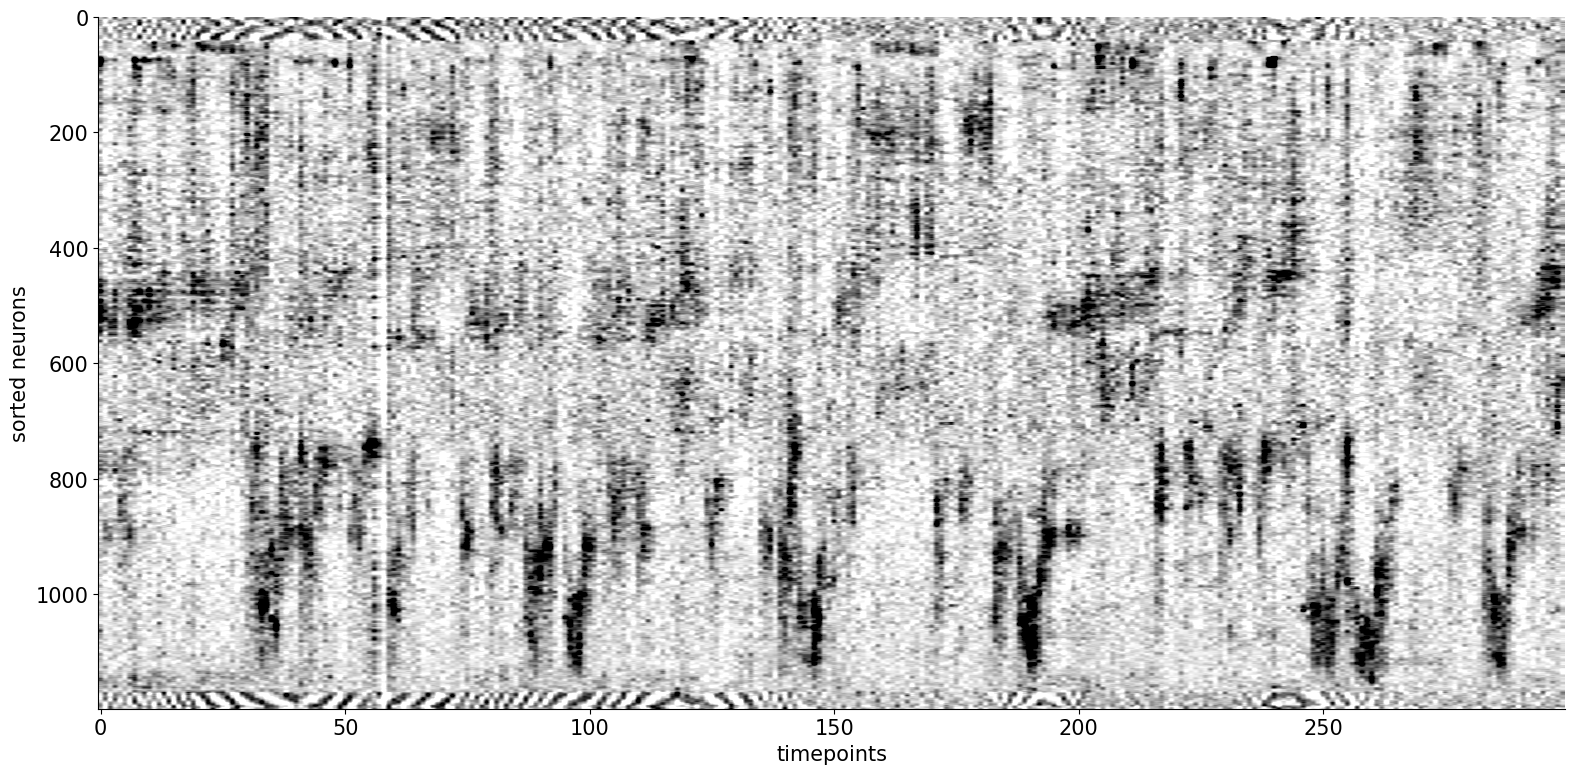

In [14]:
plt.figure(figsize=(16, 8))
ax = plt.subplot(111)
trange = np.arange(1100, 1400)
plt.imshow(RasterMap[:, trange], vmax= 3, vmin=-1, aspect='auto', cmap='gray_r')
ax.set(xlabel='timepoints', ylabel='sorted neurons')
plt.show()

In [15]:
# now sort with UMAP both the neuron axis and the timepoints axis, bin the sorted matrix and make a sorted Rastermap picture